In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter
from activ.readfile import load_preprocessed, TrackTBIFile, encode

/Users/ahyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers
sub_id = subdata.patient_ids

In [3]:
dead_data = load_data(dead=True)
dead_oc_features = dead_data.outcome_features
dead_bm_features = dead_data.biomarker_features
dead_oc = dead_data.outcomes
dead_bm = dead_data.biomarkers
dead_id = dead_data.patient_ids

In [82]:
import h5py
filename = '/Users/ahyeon/data/activ/gose1and2_shuffled.h5'
f = h5py.File(filename, 'r')

# List all groups
print(list(f.keys()))
bm = f['biomarkers'][:]
bm_feat = f['biomarker_features'][:].astype(str)

['biomarker_features', 'biomarkers', 'outcome_features', 'outcomes', 'patient_ids']


In [75]:
for ii,f in enumerate(bm_feat):
    if 'Age' in f:
        print(ii,f)

94 Age


In [77]:
bm.sha

(275, 235)

In [78]:
bm

array([[28.,  2.,  1., ...,  0.,  0.,  0.],
       [30.,  2.,  1., ...,  0.,  0.,  0.],
       [61.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [65.,  1.,  1., ...,  0.,  0.,  0.],
       [77.,  1.,  0., ...,  1.,  1.,  0.],
       [40.,  2.,  1., ...,  0.,  0.,  0.]])

In [85]:
bm[:,13]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [52]:
dead_bm_features

array(['Age', 'Sex', 'RaceAmericanIndian', 'RaceAmAl', 'RaceAsian',
       'RaceBlack', 'RaceHAPI', 'RaceWhite', 'RACE_3CAT_Black',
       'RACE_3CAT_Other', 'RACE_3CAT_White', 'PMH_Cardiac_ANY',
       'PMH_Cardiac_CHD', 'PMH_Cardiac_Arrythmia',
       'PMH_Cardiac_IschemicHD', 'PMH_Cardiac_ValvularHD',
       'PMH_Cardiac_HTN', 'PMH_Cardiac_Thromboembolic', 'PMH_Cardiac_PVD',
       'PMH_Cardiac_Other', 'PMH_Endocrine_ANY', 'PMH_Endocrine_Thyroid',
       'PMH_Endocrine_DiabetesIDDM', 'PMH_Endocrine_DiabetesNIDDM',
       'PMH_Endocrine_Other', 'PMH_EENT_ANY', 'PMH_EENT_Sinusitis',
       'PMH_EENT_Vision', 'PMH_EENT_Hearing', 'PMH_EENT_Other',
       'PMH_GI_ANY', 'PMH_GI_GERD', 'PMH_GI_Bleed', 'PMH_GI_IBS',
       'PMH_GI_Other', 'PMH_Hema_ANY', 'PMH_Hema_Anemia', 'PMH_Hema_HIV',
       'PMH_Hema_AIDS', 'PMH_Hema_Other', 'PMH_Hepatic_ANY',
       'PMH_Hepatic_Hepatitis', 'PMH_Hepatic_Cirrhosis',
       'PMH_Hepatic_Other', 'PMH_MSK_ANY', 'PMH_MSK_Arthritis',
       'PMH_MSK_Other',

In [66]:
dead_bm[:,95]

array([ 0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0

In [65]:
for ii,f in enumerate(dead_bm_features):
    if ii==95:
        print(f)
        

cause_Fall


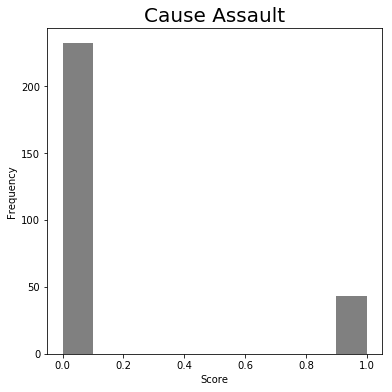

In [62]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,94]
plt.hist(gcs, color='gray')
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Cause Assault', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ_misc/gcs_hist.pdf')
plt.show()

## GCS 

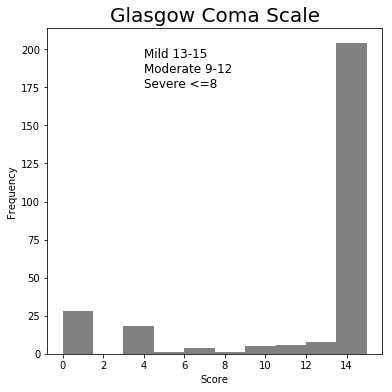

In [13]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,113]
plt.hist(gcs, color='gray')
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/gcs_hist.pdf')
plt.show()

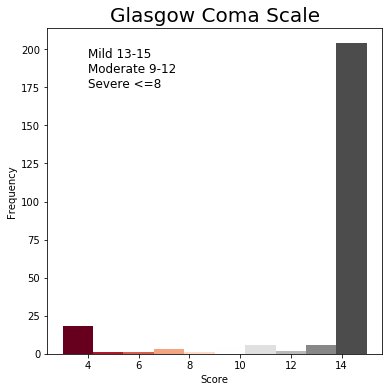

In [7]:
plt.figure(figsize=(6,6))

cm = plt.cm.get_cmap('RdGy')
n, bins, patches = plt.hist(gcs)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/10)) # notice the i/25
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()

## pmh_cardiac_arrythmia

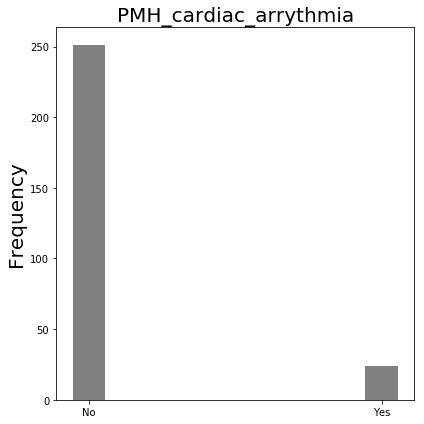

In [47]:
dead_13_new = dead_bm[:,13][247:]+1
new = np.concatenate((dead_bm[:,13][:247], dead_13_new), axis=0)

plt.figure(figsize=(6,6))
plt.title('PMH_cardiac_arrythmia', fontsize=20)
plt.hist(new-1, color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ_misc/pmh_cardiac_arrythmia_hist.pdf')
plt.show()

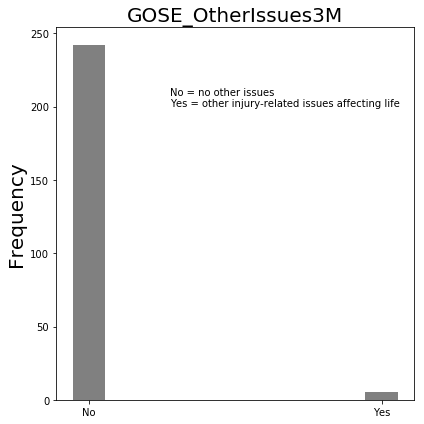

In [7]:
plt.figure(figsize=(6,6))
plt.title('GOSE_OtherIssues3M', fontsize=20)
plt.hist(sub_bm[:,3]-1, color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.text(0.3,200,'No = no other issues\nYes = other injury-related issues affecting life')
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/gose_otherissues_3m_hist.pdf')
plt.show()

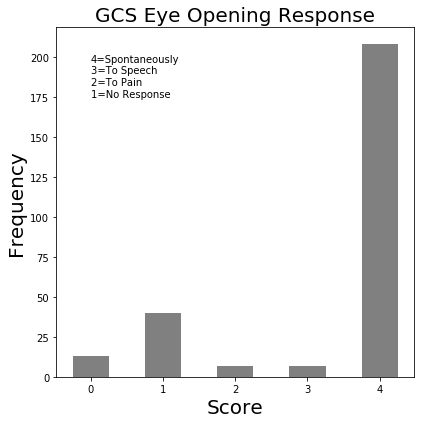

In [51]:
plt.figure(figsize=(6,6))
plt.title('GCS Eye Opening Response', fontsize=20)
plt.hist(dead_bm[:,106], align='left',bins = np.arange(0,5,0.5), color='grey')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.xticks(np.arange(5), [0,1,2,3,4])
plt.text(0,175, '4=Spontaneously\n3=To Speech\n2=To Pain\n1=No Response')
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ_misc/admgcseyes_hist.pdf')
plt.show()

## GOSE

In [17]:
for ii,f in enumerate(sub_oc_features):
    if 'GOSE' in f:
        print(f,ii)

GOSE_NeedAssistance3M 0
GOSE_WorkResume3M 1
GOSE_DisruptRelation3M 2
GOSE_OtherIssues3M 3
GOSE_OverallScore3M 4
GOSE_Reponder6M_Patient.alone 24
GOSE_Reponder6M_Patient.plus.relative 25
GOSE_NeedAssistance6M 26
GOSE_Travel6M 27
GOSE_SocialResume6M 28
GOSE_OtherIssues6M 29
GOSE_Epilepsy6M 30
GOSE_EpilepsyRisk6M 31
GOSE_OverallScore6M 32


In [45]:
for ii,f in enumerate(dead_oc_features):
    if 'GOSE' in f:
        print(f,ii)

GOSE_NeedAssistance3M 0
GOSE_WorkResume3M 1
GOSE_DisruptRelation3M 2
GOSE_OtherIssues3M 3
GOSE_OverallScore3M 4
GOSE_Reponder6M_Patient.alone 24
GOSE_Reponder6M_Patient.plus.relative 25
GOSE_NeedAssistance6M 26
GOSE_Travel6M 27
GOSE_SocialResume6M 28
GOSE_OtherIssues6M 29
GOSE_Epilepsy6M 30
GOSE_EpilepsyRisk6M 31
GOSE_OverallScore6M 32


In [46]:
dead_oc[:,4]

array([8., 6., 8., 8., 8., 6., 5., 8., 4., 8., 8., 7., 8., 7., 8., 6., 8.,
       7., 6., 7., 7., 7., 8., 6., 5., 8., 7., 5., 3., 7., 7., 5., 8., 5.,
       8., 4., 6., 7., 6., 6., 7., 5., 3., 8., 6., 3., 8., 4., 4., 5., 6.,
       7., 8., 8., 7., 6., 6., 8., 4., 8., 5., 6., 6., 5., 8., 5., 6., 6.,
       3., 8., 4., 6., 8., 6., 7., 7., 5., 8., 6., 8., 8., 8., 8., 7., 7.,
       8., 8., 7., 8., 8., 8., 8., 6., 8., 7., 8., 7., 8., 7., 7., 8., 7.,
       8., 7., 7., 7., 5., 7., 8., 5., 8., 7., 8., 7., 7., 7., 5., 6., 7.,
       7., 8., 7., 7., 6., 6., 6., 8., 7., 7., 6., 8., 6., 7., 6., 8., 7.,
       6., 7., 3., 8., 7., 7., 7., 7., 6., 7., 8., 5., 7., 8., 4., 7., 8.,
       8., 7., 5., 7., 4., 8., 7., 5., 5., 8., 8., 6., 8., 8., 7., 7., 5.,
       8., 7., 6., 7., 7., 7., 7., 7., 8., 5., 4., 7., 8., 6., 4., 8., 5.,
       5., 8., 6., 7., 8., 6., 5., 5., 7., 8., 5., 5., 6., 5., 5., 7., 7.,
       7., 8., 8., 7., 5., 8., 7., 7., 7., 7., 8., 8., 7., 8., 6., 6., 8.,
       5., 7., 7., 7., 7.

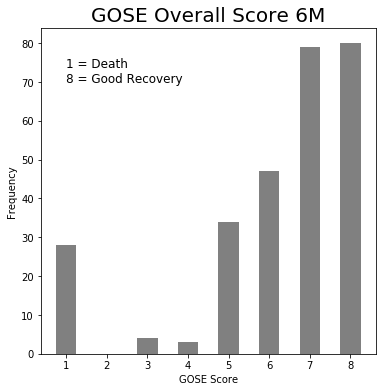

In [50]:
gose_overallscore_6m = dead_oc[:,32]
plt.subplots(figsize = (6,6))
plt.hist(gose_overallscore_6m, align='left', bins=np.arange(1,9,0.5), color='gray')
plt.title('GOSE Overall Score 6M', fontsize=20)
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.text(1,70, '1 = Death\n8 = Good Recovery',fontsize=12)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/gose6m_hist.pdf')
plt.show()

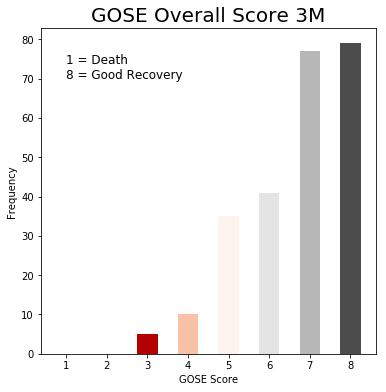

In [11]:
plt.subplots(figsize = (6,6))
cm = plt.cm.get_cmap('RdGy')
idx = np.arange(0,1,1/17)
red = (0.7, 0.0, 0.0, 1.0)
grey = (0.0, 0.0, 0.0, 0.7)
colors = [cm(j) for j in idx]
colors[14]=grey
colors[4]=red

gose_overallscore_3m = sub_oc[:,4]

n, bins, patches = plt.hist(gose_overallscore_3m, align='left', bins=np.arange(1,9,0.5))
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', colors[i]) 
    
plt.title('GOSE Overall Score 3M', fontsize=20)
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.text(1,70, '1 = Death\n8 = Good Recovery',fontsize=12)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gose3m_hist.pdf')
plt.show()

## CVLT

In [9]:
sub_oc_features

array(['GOSE_NeedAssistance3M', 'GOSE_WorkResume3M',
       'GOSE_DisruptRelation3M', 'GOSE_OtherIssues3M',
       'GOSE_OverallScore3M', 'NeuroPhysHeadache3mo',
       'NeuroPhysBalanceProbl3mo', 'NeuroPhysDizziness3mo',
       'NeuroPhysVisualProbl3mo', 'NeuroPhysFatigue3mo',
       'NeuroPhysLightSensitivity3mo', 'NeuroPhysNoiseSensitivity3mo',
       'NeuroPhysNumbnessTingling3mo', 'NeuroSleepDrowsiness3mo',
       'NeuroSleepSleepingLess3mo', 'NeuroSleepSleepingMore3mo',
       'NeuroSleepTroubleFallingAsleep3mo', 'NeuroCognitiveFoggy3mo',
       'NeuroCognitiveSlowedDown3mo',
       'NeuroCognitiveDiffConcentrating3mo',
       'NeuroCognitiveDiffRemembering3mo',
       'NeuroEmotionalMoreEmotional3mo', 'NeuroEmotionalNervousness3mo',
       'NeuroOverallRating3mo', 'GOSE_Reponder6M_Patient.alone',
       'GOSE_Reponder6M_Patient.plus.relative', 'GOSE_NeedAssistance6M',
       'GOSE_Travel6M', 'GOSE_SocialResume6M', 'GOSE_OtherIssues6M',
       'GOSE_Epilepsy6M', 'GOSE_EpilepsyRis

In [15]:
for ii,f in enumerate(sub_oc_features):
    if 'NeuroCognitiveFoggy3mo' in f:
        print(ii,f)

17 NeuroCognitiveFoggy3mo


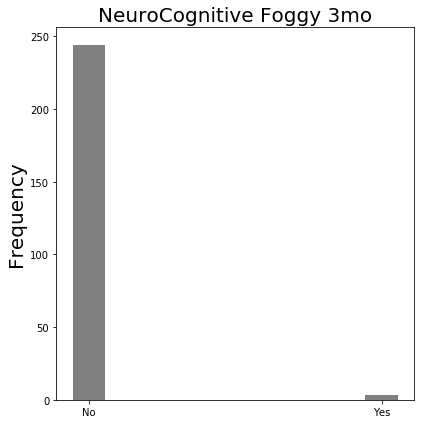

In [20]:

plt.figure(figsize=(6,6))
plt.title('NeuroCognitive Foggy 3mo', fontsize=20)
plt.hist(sub_bm[:,17]-1, color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/neurocognitive_foggy_3m_hist.pdf')
plt.show()


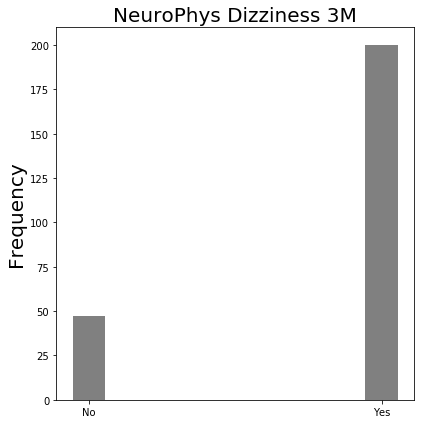

In [13]:
plt.figure(figsize=(6,6))
plt.title('NeuroPhys Dizziness 3M', fontsize=20)
plt.hist(sub_bm[:,7]-1, color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/neurophys_dizziness_3m_hist.pdf')
plt.show()

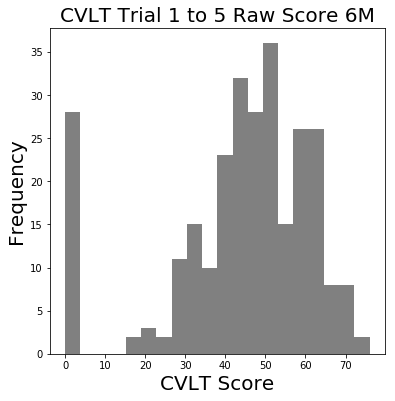

In [19]:
plt.figure(figsize=(6,6))
plt.hist(dead_oc[:,154], color='grey', bins=20)
plt.title('CVLT Trial 1 to 5 Raw Score 6M', fontsize=20)
plt.xlabel('CVLT Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/cvlt_hist.pdf')
plt.show()

## RPQ

In [17]:
dead_oc[:,93]

array([ 0.,  5.,  0.,  0.,  0.,  3.,  0.,  2.,  4.,  0.,  0.,  7.,  4.,
        4.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  2.,  2.,  4.,  0.,
        3., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        2.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  4.,  0.,  5.,  2.,  0.,
        0.,  0.,  0.,  7.,  0.,  0.,  0.,  4.,  0.,  2.,  3.,  4.,  2.,
        2.,  5.,  7.,  0.,  4.,  3.,  2.,  0.,  6.,  0.,  5.,  8.,  0.,
        4.,  4.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  4.,  0.,  0.,  0.,
        0.,  2.,  0.,  4.,  0.,  2.,  4.,  4.,  4.,  0.,  0.,  2.,  3.,
        2.,  4.,  4.,  0.,  7.,  3.,  0.,  3.,  0.,  2.,  0.,  3.,  5.,
        0.,  0.,  0.,  0.,  0.,  0.,  6.,  7.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  5.,  0.,  2.,  5.,  3.,  0.,  9.,  0.,  0.,
        4.,  2.,  0.,  0.,  2.,  0.,  0.,  5.,  5.,  0.,  0.,  4.,  2.,
        0.,  4.,  0.,  0.,  8.,  0.,  0.,  0.,  8.,  0.,  2., 10.,  0.,
        9.,  0.,  5.,  7.,  6.,  7.,  5.,  0.,  2.,  2.,  3.,  2

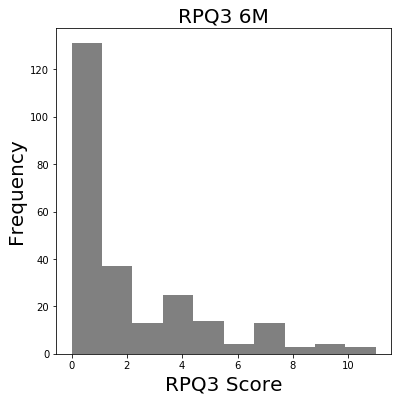

In [18]:
plt.figure(figsize=(6,6))
plt.hist(sub_oc[:,93], color='grey')
plt.title('RPQ3 6M', fontsize=20)
plt.xlabel('RPQ3 Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/rpq3_hist.pdf')
plt.show()